<a href="https://colab.research.google.com/github/Rectifiant/StatsHomework/blob/main/Joel_Medrano_final_copy_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests #importing requests
from pdf2image import convert_from_path #geting an image from pdf2image
import matplotlib.pyplot as plt #use plt for matplotlib
import numpy as np #us np as numpy
import torch #importing torches
import requests #importing requests
from torchvision import * #importing information
from torchvision.models import * #importing information
from flashtorch.utils import apply_transforms #from the file import transforms
import wandb as wb #us wb for wandb

In [3]:
def GPU(data): #define gpu
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) #copying data and returns the data

def GPU_data(data):#define the gpu_data
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))#copying data and returns the data

def plot(x): #define plot
    fig, ax = plt.subplots() #figure and axes
    im = ax.imshow(x, cmap = 'gray') #im 3d and imshow is 2d with the color gray
    ax.axis('off') #library used to plot x and y
    fig.set_size_inches(5, 5) # the size of the figure
    plt.show() #produces a plot 
    
def get_google_slide(url): #define 
    url_head = "https://docs.google.com/presentation/d/" #will be a google presentation
    url_body = url.split('/')[5]  # will space out
    page_id = url.split('.')[-1] #the 
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #return all and export

def get_slides(url): #define get_slides
    url = get_google_slide(url) #url is the google slide
    r = requests.get(url, allow_redirects=True) # will allow request
    open('file.pdf', 'wb').write(r.content) #open the file and write
    images = convert_from_path('file.pdf', 500)n #the image will be resized 
    return images

def load(image): #define load 

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) #manipulating the image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #

In [4]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #getting the lables from the link

model = alexnet(weights='DEFAULT').to(device) #set model to default
model.eval();#

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [14]:
url = "https://docs.google.com/presentation/d/10n4hEB25HLUWmfripqXXZJD23TtU2A3i8fKsCXK7wa8/edit#slide=id.g1ad63b1effc_0_32" #a url link

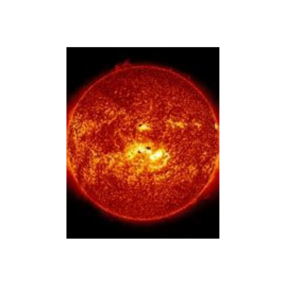

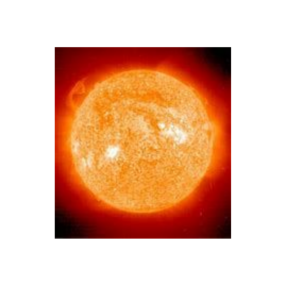

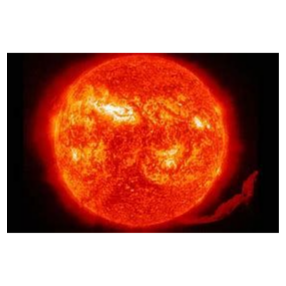

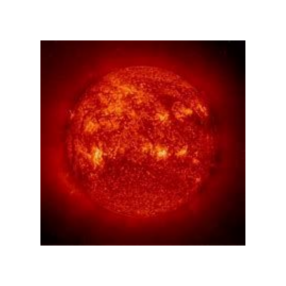

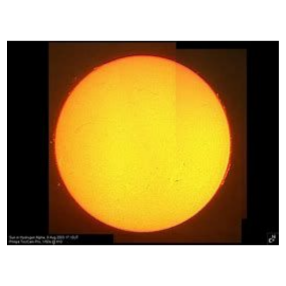

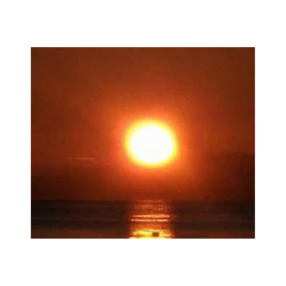

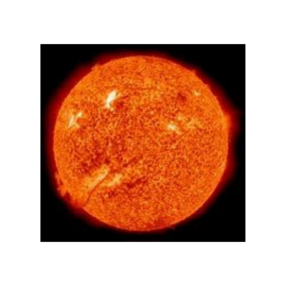

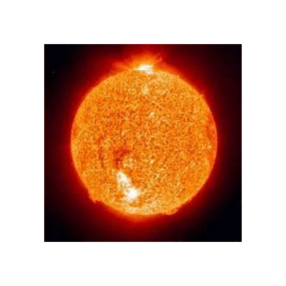

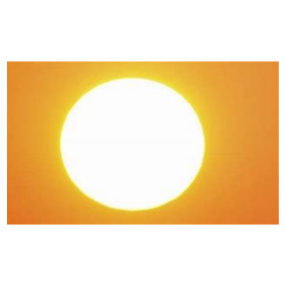

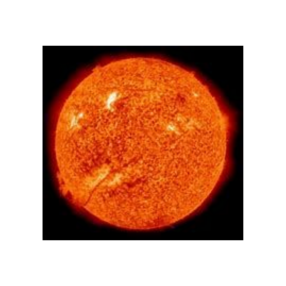

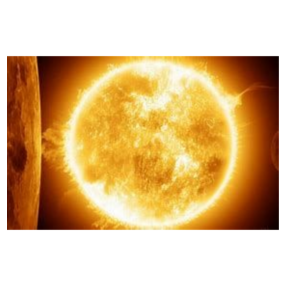

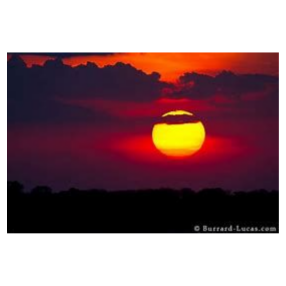

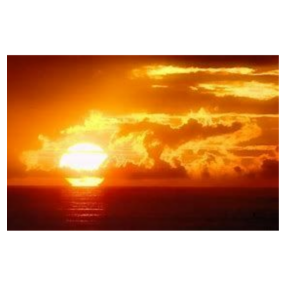

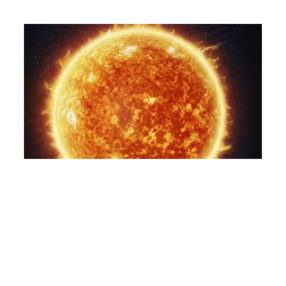

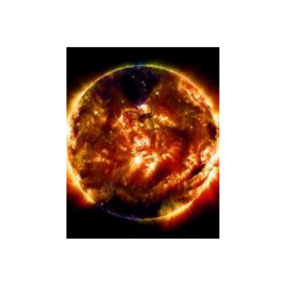

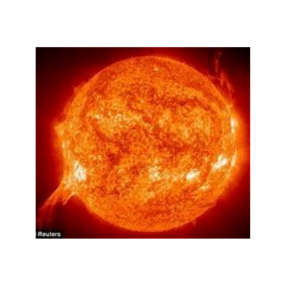

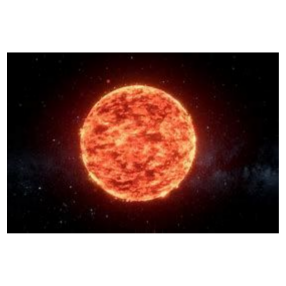

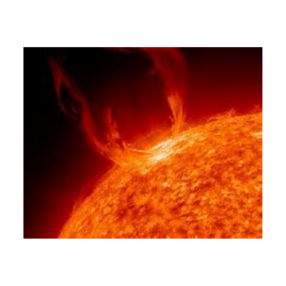

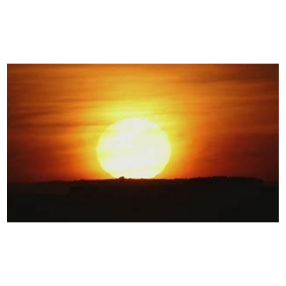

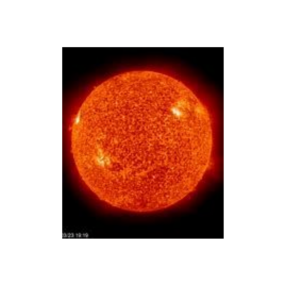

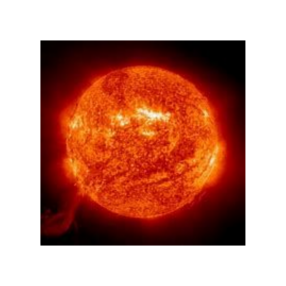

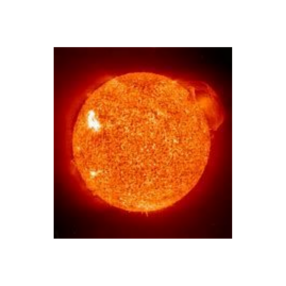

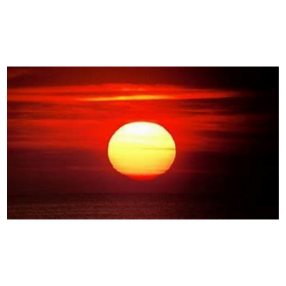

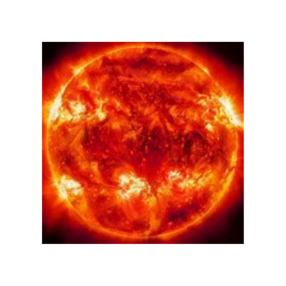

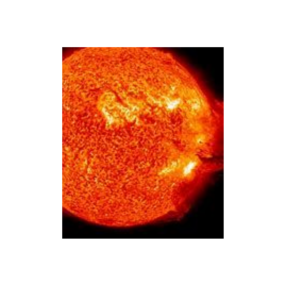

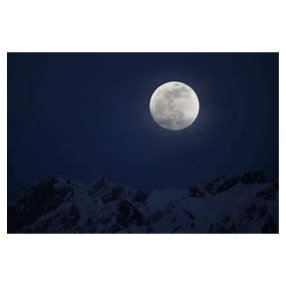

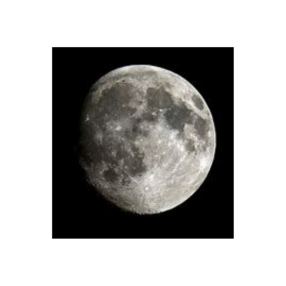

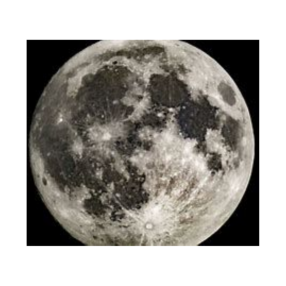

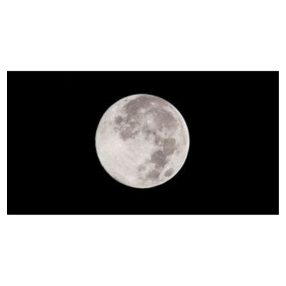

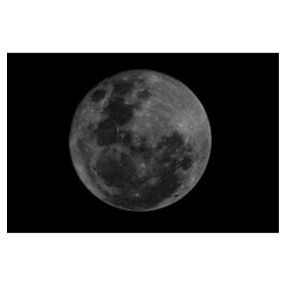

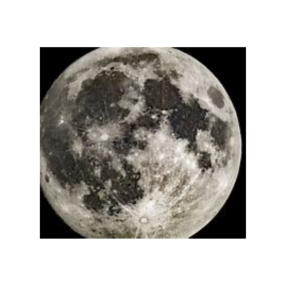

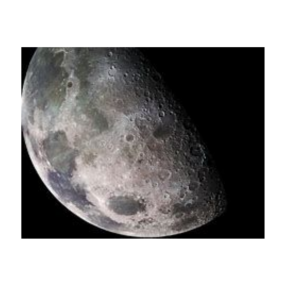

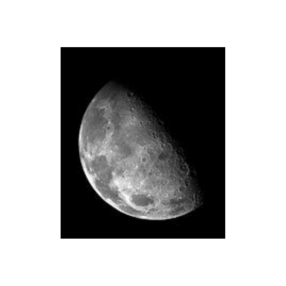

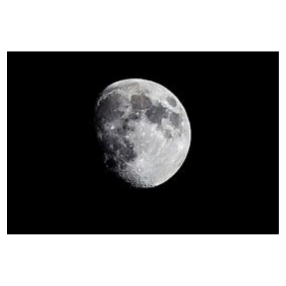

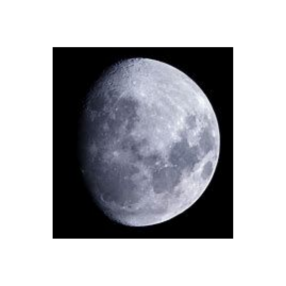

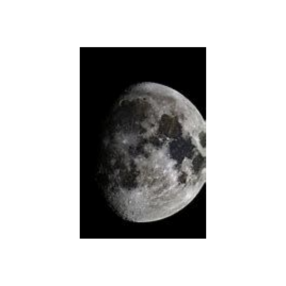

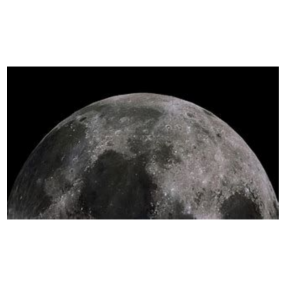

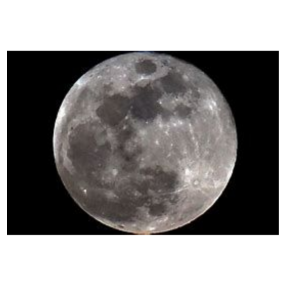

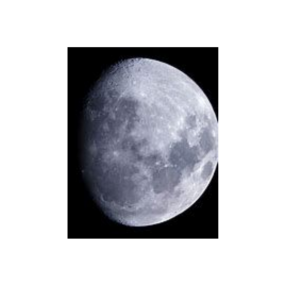

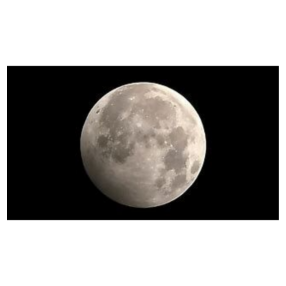

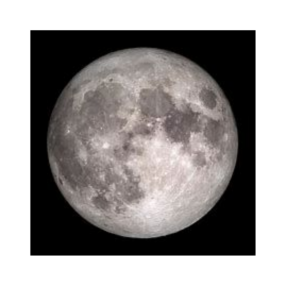

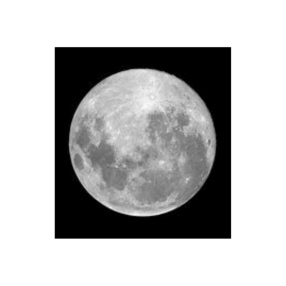

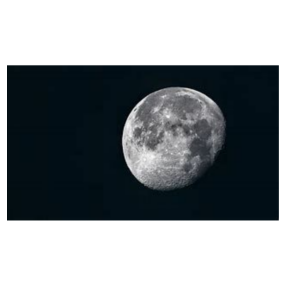

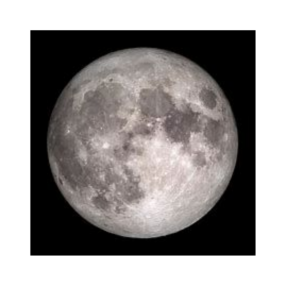

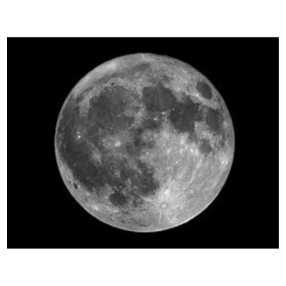

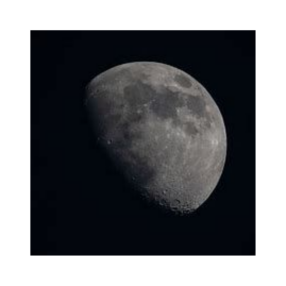

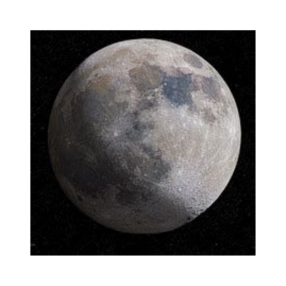

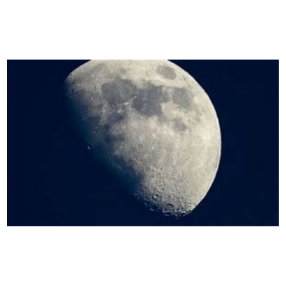

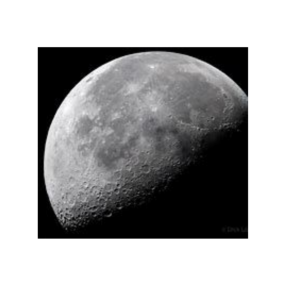

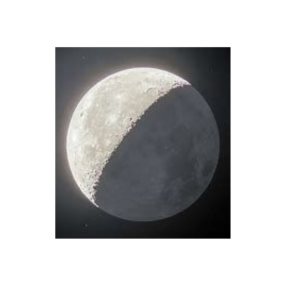

In [13]:
images = [] #images 

for image in get_slides(url): #get images in the url

    plot(image) #ddisplay the images

    images.append(load(image))# load all images

images = torch.vstack(images) #store images 

In [16]:
images.shape #the size of the image

torch.Size([50, 3, 224, 224])

In [17]:
model(images) #the values of model images

tensor([[-3.3452,  3.6454, -4.0509,  ...,  3.1495,  2.9453,  1.3700],
        [ 0.0345,  4.3541, -4.0624,  ...,  3.5801,  3.7167,  0.1119],
        [-2.0174,  6.2972, -5.6098,  ...,  1.9726,  3.4387,  0.3389],
        ...,
        [-1.4923, -2.1941,  3.0642,  ...,  1.0062,  0.6209,  5.2957],
        [-0.7362, -1.7914,  1.5926,  ...,  3.3986,  2.6168,  5.0470],
        [-1.8268, -1.4252,  0.6344,  ...,  0.1257,  0.9143,  6.7940]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [18]:
y = model(images) #y is set equal to model images

In [19]:
y.shape #yshape value

torch.Size([50, 1000])

In [20]:
guesses = torch.argmax(y, 1).cpu().numpy() #suggested guesses

In [21]:
for i in list(guesses): #for in in a list of guesses 
    print(labels[i]) #print all labels 

lampshade, lamp shade
buckeye, horse chestnut, conker
lampshade, lamp shade
matchstick
lampshade, lamp shade
candle, taper, wax light
orange
orange
iPod
orange
espresso
airship, dirigible
candle, taper, wax light
toaster
rotisserie
French loaf
fig
volcano
television, television system
lampshade, lamp shade
lampshade, lamp shade
lampshade, lamp shade
ping-pong ball
rotisserie
lampshade, lamp shade
cleaver, meat cleaver, chopper
gong, tam-tam
gong, tam-tam
analog clock
shower cap
gong, tam-tam
electric ray, crampfish, numbfish, torpedo
pick, plectrum, plectron
golf ball
pick, plectrum, plectron
golf ball
nematode, nematode worm, roundworm
golf ball
breastplate, aegis, egis
golf ball
gong, tam-tam
pick, plectrum, plectron
golf ball
gong, tam-tam
pick, plectrum, plectron
golf ball
pick, plectrum, plectron
golf ball
pick, plectrum, plectron
pick, plectrum, plectron


In [22]:
Y = np.zeros(50,) #50 values
Y[25:] = 1  #25 of them equal 1

In [23]:
Y #all y values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
X = y.detach().cpu().numpy() 

In [25]:
X.shape # the value of x shape

(50, 1000)

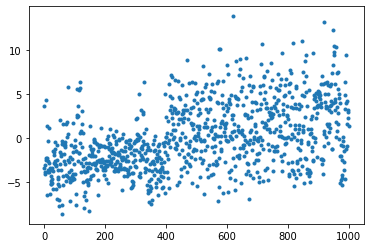

In [26]:
plt.plot(X[0],'.') #plot the points using '.'

In [27]:
X[0] #print all values for X0

array([-3.34521627e+00,  3.64537597e+00, -4.05090857e+00, -3.79502511e+00,
       -2.99803185e+00,  4.31982708e+00, -2.42063761e+00, -2.29447317e+00,
       -2.30249596e+00, -6.40217590e+00,  1.40316153e+00, -2.56299305e+00,
       -3.20069075e-01, -3.62730789e+00, -3.78918719e+00,  1.20507181e+00,
       -2.83609653e+00, -3.80364466e+00, -3.64254904e+00, -3.33864427e+00,
       -6.28823185e+00, -5.14047575e+00, -4.24374819e+00, -5.20529032e+00,
       -4.80524158e+00, -4.60990620e+00, -5.10118675e+00, -3.41310644e+00,
       -1.50976670e+00, -3.72307897e+00, -5.76150227e+00, -1.89236534e+00,
       -1.59476423e+00, -2.85413551e+00, -3.94951522e-01, -2.63102674e+00,
       -2.88264322e+00, -1.21911609e+00, -3.19561791e+00, -5.79303503e+00,
       -3.04785967e+00, -6.89445210e+00, -2.51452971e+00, -8.01152825e-01,
       -5.24025536e+00, -4.68074989e+00, -3.61909962e+00, -4.37304735e+00,
       -7.71685553e+00, -6.99123240e+00, -5.46633291e+00,  2.07614255e+00,
       -1.54592586e+00, -

In [28]:
np.argmax(X[0])

619

In [29]:
labels[948] #the label for 948 is printed

'Granny Smith'

In [30]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [31]:
for i in top_ten: #for i in top ten , print all labels
    print(labels[i])

lampshade, lamp shade
traffic light, traffic signal, stoplight
strawberry
table lamp
spotlight, spot
pick, plectrum, plectron
fig
pomegranate
golf ball
gong, tam-tam


In [32]:
labels #print all labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 19., 107., 237., 238., 137., 137.,  86.,  23.,  13.,   3.]),
 array([-8.581929  , -6.342989  , -4.104049  , -1.8651091 ,  0.37383097,
         2.612771  ,  4.8517113 ,  7.090651  ,  9.329591  , 11.568531  ,
        13.807471  ], dtype=float32),
 <a list of 10 Patch objects>)

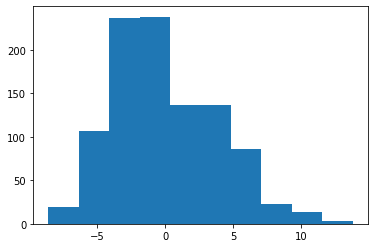

In [33]:
plt.hist(X[0]) #plot the histogram

In [34]:
X = GPU_data(X) # x value 
Y = GPU_data(Y) #y value

In [35]:
def softmax(x): #define softmax 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None]) #s1 willl equal ther equation
    s = s1 / s1.sum(1)[:,None]
    return s #return values for s

In [36]:
def cross_entropy(outputs, labels):             #define cross_entropy 
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0] #return all values 

In [37]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0  #mu equals 0
    sigma = 0.1 #sigma is given a set value
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma) #r equals the equation
    return R.rvs(s)

In [38]:
def Truncated_Normal(size): # define truncated normal

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2) #u1 equals the equaltion
    u2 = torch.rand(size)#u2 equals the equaltion
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)#z equals the equaltion

    return z

In [39]:
def acc(out,y): #define acc
    with torch.no_grad(): #a loop
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] #return the values 

In [40]:
X.shape #print the values for x shape

torch.Size([50, 1000])

In [41]:
def get_batch(mode): #define get_batch
    b = c.b #set b equal to c.b
    if mode == "train": #if mode equasls train then 
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]  
        y = Y[r:r+b]
    elif mode == "test": n#if not then 
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y #return x and y values

In [42]:
def model(x,w): #define model 

    return x@w[0] #return values

In [43]:
def make_plots(): #define make_plots
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [44]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()  # 
    optimizer.step()
   
    wb.log({"loss": loss}) #will log losses

    make_plots() #will make the plots


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/click/termui.py", line 129, in prompt_func
    return f("")
  File "/usr/local/lib/python3.8/dist-packages/click/termui.py", line 54, in hidden_prompt_func
    return getpass.getpass(prompt)
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 843, in getpass
    return self._input_request(prompt,
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 904, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/

Exception: ignored

https://tensorspace.org/